# Week 9-11: Central limit theorem, Descriptive statistics


 #### [Back to main page](https://petrosyan.page/fall2020math3215)


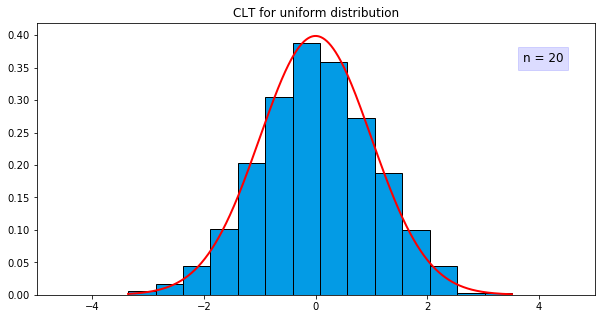

In [1]:
# nbi:hide_in
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)

N=1000 #max number of samples
num = 1000 # number of experiments
a=2
b=4
# intsize the number of intervals
plot_width = 2

data =np.random.rand(N, num)*(b-a)+a
mean = (b+a)/2
sigma = np.sqrt((b-a)**2/12)

def pdf_func(xdata, mu, sigma):
    val = np.exp(-np.power(xdata-mu,2)/(2*sigma**2))/(sigma *np.sqrt(2*np.pi))
    return val

def epmf(x, inter, intsize):
    epmf_values = np.zeros(intsize-1)
    for i in range(intsize-1): 
        length = inter[i+1]-inter[i]
        epmf_values[i] = np.sum((inter[i]<=x) & (x<inter[i+1]))/(x.size*length)
    return epmf_values 

def mean_hist(n, intsize=21):
    xvalues = np.linspace(a,b, 1000)
    plt.plot(xvalues, pdf_func(xvalues, mean, sigma/np.sqrt(n)), linewidth=2, color="red")
    x = np.sum(data[0:n,:], axis=0)/n
    xmax = np.max(x)
    xmin = np.min(x)
    inter = np.linspace(xmin,xmax,intsize)
    length = inter[1]-inter[0]
    epmf_values = epmf(x, inter, intsize)
    plt.bar(inter[:intsize-1], epmf_values, width=length, 
            color='#039be5', edgecolor='black', linewidth=1, 
            align="edge", label="True histogran")
    plt.figtext(0.8,0.8, "n = {}".format(n), ha="left", va="top",
        backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    
def mean_hist_std(n, intsize=20):
    x = np.sum(data[0:n,:], axis=0)/n
    z = np.sqrt(n)*(x-mean)/sigma 
    zmax = np.round(np.max(z), 2)
    zmin = np.round(np.min(z), 2)
    inter = np.linspace(zmin,zmax,intsize)   
    length = inter[1]-inter[0]
    epmf_values = epmf(z, inter, intsize)
    
    # plot normal distribution
    xvalues = np.linspace(zmax,zmin, 1000)
    plt.plot(xvalues, pdf_func(xvalues, 0, 1), linewidth=2, color="red")
    
    plt.bar(inter[:intsize-1], epmf_values, width=length, 
            color='#039be5', edgecolor='black', linewidth=1, 
            align="edge", label="True histogran")
    plt.figtext(0.8,0.8, "n = {}".format(n), ha="left", va="top",
        backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.xlim(-5, 5)
    plt.title("CLT for uniform distribution")
 
# mean_hist_std(10)
mean_hist_std(20, 15)

plt.show();


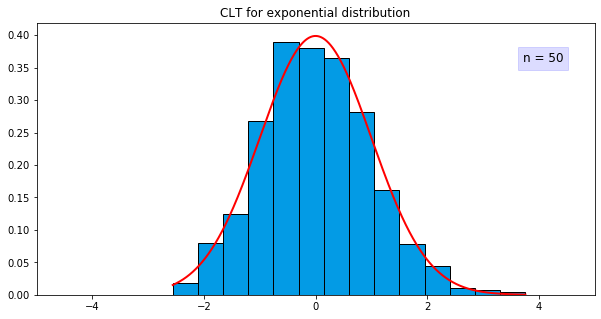

In [406]:
# nbi:hide_in
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)

N=1000 #max number of samples
num = 1000 # number of experiments
# intsize the number of intervals
theta=2

data =np.random.exponential(theta, [N, num] )
mean = theta
sigma = theta

def pdf_func(xdata, mu, sigma):
    val = np.exp(-np.power(xdata-mu,2)/(2*sigma**2))/(sigma *np.sqrt(2*np.pi))
    return val

def epmf(x, inter, intsize):
    epmf_values = np.zeros(intsize-1)
    for i in range(intsize-1): 
        length = inter[i+1]-inter[i]
        epmf_values[i] = np.sum((inter[i]<=x) & (x<inter[i+1]))/(x.size*length)
    return epmf_values 

def mean_hist(n, intsize=25):
    xvalues = np.linspace(mean-5,mean+5, 1000)
    plt.plot(xvalues, pdf_func(xvalues, mean, sigma/np.sqrt(n)), linewidth=2, color="red")
    x = np.sum(data[0:n,:], axis=0)/n
    xmax = np.max(x)
    xmin = np.min(x)
    inter = np.linspace(xmin,xmax,intsize)    
    length = inter[1]-inter[0]
    epmf_values = epmf(x, inter, intsize)
    plt.bar(inter[:intsize-1], epmf_values, width=length, 
            color='#039be5', edgecolor='black', linewidth=1, 
            align="edge", label="True histogran")
    plt.figtext(0.8,0.8, "n = {}".format(n), ha="left", va="top",
        backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    
def mean_hist_std(n, intsize=26):
    x = np.sum(data[0:n,:], axis=0)/n
    z = np.sqrt(n)*(x-mean)/sigma 
    zmax = np.round(np.max(z), 2)
    zmin = np.round(np.min(z), 2)
    inter = np.linspace(zmin,zmax,intsize)     
    length = inter[1]-inter[0]
    epmf_values = epmf(z, inter, intsize)
    
    xvalues = np.linspace(zmin,zmax, 1000)
    plt.plot(xvalues, pdf_func(xvalues, 0, 1), linewidth=2, color="red")
    
    plt.bar(inter[:intsize-1], epmf_values, width=length, 
            color='#039be5', edgecolor='black', linewidth=1, 
            align="edge", label="True histogran")
    plt.figtext(0.8,0.8, "n = {}".format(n), ha="left", va="top",
        backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.xlim(-5, 5)
    plt.title("CLT for exponential distribution")
    
# mean_hist_std(10)
# mean_hist(10, 51)
mean_hist_std(50, 15)


plt.show();


### Binomial vs Normal vs Poisson

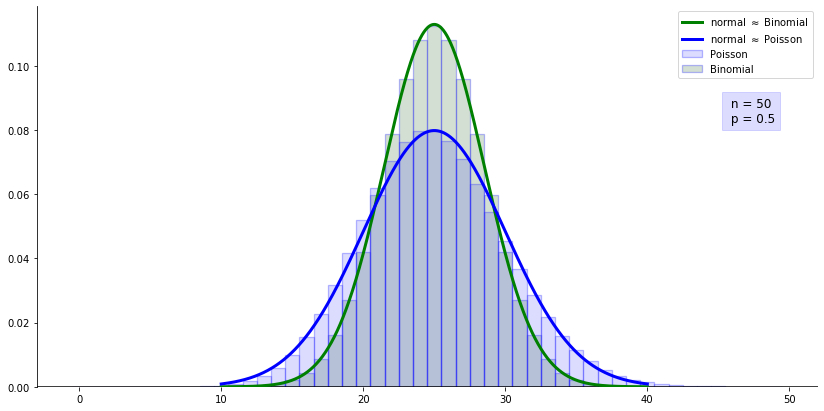

In [84]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb, factorial
from scipy.stats import poisson


def pdf_func(xdata, mu, sigma):
    val = np.exp(-np.power(xdata-mu,2)/(2*sigma**2))/(sigma *np.sqrt(2*np.pi))
    return val

def poiss_binom_pmf(n, p):
    lam = n*p
    q = 1-p
    N = 50
    brange_x = np.arange(0, np.minimum(n, 100), 1)
    prange_x = np.arange(0, np.minimum(n, 100), 1)
    
    mean = n*p
    sigma = np.sqrt(n*p*q)
    xvalues = np.linspace(mean-15,mean+15, 1000)

    def poiss_pmf(x, lam):
        pmf_val = np.exp(-lam) * np.power(lam, x) / factorial(x)
        return pmf_val

#     ppmf_values = np.array([poiss_pmf(x, lam) for x in prange_x])
    ppmf_values = np.array([poisson.pmf(x, lam) for x in prange_x])
    def binom_pmf(x):
        pmf_val = comb(n, x, exact=True) * p**x * q**(n-x)
        return pmf_val
    mean = n*p

    bpmf_values = np.array([binom_pmf(x) for x in brange_x])

    # plot setup
    plt.figure(figsize=(14,7)) 
    plt.axhline(y=0, color='k')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Plotting poisson
    plt.bar(prange_x, ppmf_values, width=1, color=(0.1, 0.1, 1, 0.15), edgecolor=(0.1, 0.1, 1, 0.3), 
            linewidth=1.3, label="Poisson",zorder=-1)
    
    # Plotting binomial
    plt.bar(brange_x, bpmf_values, width=1, color=(0.3, 0.5, 0.3, 0.25), edgecolor=(0.1, 0.1, 1, 0.3),
            linewidth=1.3, label="Binomial", zorder=-2)
    
    # Plotting normal for Binomial
    plt.plot(xvalues, pdf_func(xvalues, mean, sigma), linewidth=3, color="green", 
             label=r"normal $\approx$ Binomial", zorder=3)
    
    # Plotting normal for Poisson
    plt.plot(xvalues, pdf_func(xvalues, lam, np.sqrt(lam)), linewidth=3, color="blue", 
             label=r"normal $\approx$ Poisson", zorder=3)
    
    
    plt.figtext(0.81,0.7, " n = {}".format(n)+"\n p = {}".format(p), ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.legend()
    plt.plot();

poiss_binom_pmf(50, 0.5)

### Box plots

Below we display the blox plot of the following data:

$$\{-30,-1, -5, -0.5, 0.5, 0.6, 0, 2, 3, 4.6, 4, 7, 18, 35\}.$$

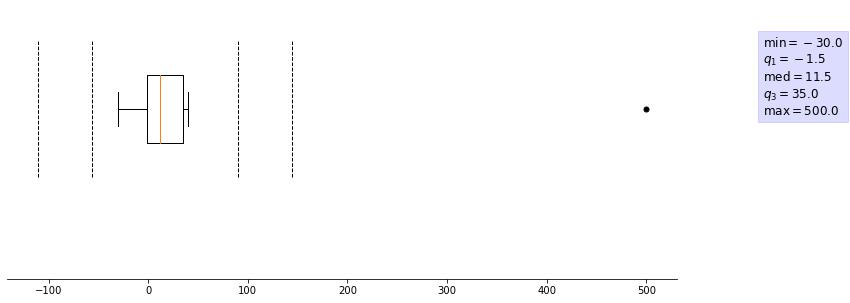

In [1]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np

# set up the figure
fig, ax = plt.subplots(1,1, figsize=(12,5))

# data
data = np.array([-30, -5,  9, 10, 13, 20, 40, 500]).astype(float)
# data = np.array([-30,-1, -5, -0.5, 0.5, 0.6, 0, 2, 3, 4.6, 4, 7, 18, 35]).astype(float)


def percentile(data, p):
    """
    Compute the percentiles the way we defined in class 
    data : array of size N 
    p : percentile
    """
    data = np.sort(data, axis=0)
    rank = int(p * (data.shape[0] + 1) - 1) # the rank
    assert rank > 0, "the rank does not exist" 
    alpha = p * (data.shape[0] + 1) - 1 - rank # the fractional part
    return data[rank] + alpha * (data[rank + 1] - data [rank])

def box_plot(ax, data, width=0.4, showout = True, position = np.array([0.4])):
    """
    ax : matplotlib ax
    data : the data 
    width : box width
    showout : show the outliers   
    position: the y axis of the box plot
    """
    # compute the five number summary 
    minim = np.min(data)
    maxim = np.max(data)
    q1 = percentile(data, 0.25)
    q2 = np.median(data)
    q3 = percentile(data, 0.75)

    # interquartile range
    iqr = q3 - q1

    # inner fences
    left_innerfence = q1 - 1.5 * iqr
    right_innerfence = q3 + 1.5 * iqr

    # compute outliers 
    outliers = data[np.logical_or(data <left_innerfence, data >= right_innerfence)]
    
    # whiskers
    if showout==True:
        low_whisker = np.min(data[data >= left_innerfence])
        high_whisker = np.max(data[data <= right_innerfence])
    else:
        low_whisker = np.min(data)
        high_whisker = np.max(data)



    stats = [{'iqr': iqr,
              'whishi': high_whisker,
              'whislo': low_whisker,
              'fliers': outliers,
              'q1': q1,
              'med': q2,
              'q3': q3}]

    # add the box plot
    flierprops = dict(markerfacecolor='black', markersize=5)
    ax.bxp(stats, vert = False, widths=width, positions = position, 
           flierprops=flierprops, showfliers=showout)

    # add Tukey's fences
    if showout==True:
        ax.vlines(q1-1.5*iqr, position-0.2,position+0.2, linestyle="dashed", linewidth=1)
        ax.vlines(q3+1.5*iqr, position-0.2,position+0.2, linestyle="dashed", linewidth=1)

        ax.vlines(q1-3*iqr, position-0.2,position+0.2, linestyle="dashed", linewidth=1)
        ax.vlines(q3+3*iqr, position-0.2,position+0.2, linestyle="dashed", linewidth=1)

    #  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_ylim(-0.1,position+0.3)
    ax.set_yticks([])
    plt.figtext(1,0.8,
                r"$\min={:.4}$".format(minim)+"\n"+
                r"$q_1={:.4}$".format(q1)+"\n"+
                r"med$={:.4}$".format(q2)+"\n"+
                r"$q_3={:.4}$".format(q3)+"\n"+
                r"max$={:.4}$".format(maxim),
                ha="left", va="top",
                backgroundcolor=(0.1, 0.1, 1, 0.15),
                fontsize="large")
    
def disp_data(ax, data):
    ax.scatter(data, np.zeros(data.shape), zorder=2, s=10)
    ax.set_yticks([])
#     ax.set_xticks([])
    mean = np.mean(data)
    ax.scatter(mean, 0, zorder=2, s=20, color="red")
    ax.set_ylim(-0.01,0.1)
    ax.axhline(y=0, color='k', zorder=1, linewidth=0.5)

    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.set_ylim(-0.1,1.5)
            
box_plot(ax, data, width=0.2, showout=True)

plt.show();